<a href="https://colab.research.google.com/github/Mdanish2020/Credit_card_default_prediction/blob/main/ML_Capstone(Classification)Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

### Let's begin the another journey towards Machine Learning.

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

#### Let's invite the data

In [ ]:
# call data from drive
cred_df = pd.read_excel('/content/drive/MyDrive/Data/default of credit card clients.xls')

In [ ]:
# looking at first 5 instances
cred_df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


#### Our dataset looks so fuzzy, we have to make some changes like changing to names of columns.

In [ ]:
# Now its time to find out rows and columns 
cred_df.shape

(30001, 25)

Wow! we have 30,001 instances and 25 features including dependent variable to work on...

Let's start further steps.


In [ ]:
# getting all info about the features of credit card dataset
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

### There are 0 null-values in the given dataset. So, we don't have to deal with that.

We have to change the name of columns in order to work properly and with ease.

In [ ]:
# Creating variable with the help of index 0
column_names = list(cred_df.iloc[0].values)
# droping first row 
cred_df.drop(index = cred_df.index[0],axis = 0, inplace = True)
# Reset the columns
cred_df = cred_df.set_axis(column_names,axis = 1)
# Changing the data-types of each features
cred_df = cred_df.astype('int')
cred_df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [ ]:
cred_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Describing the columns 

* ID: ID of each customer
* LIMIT_BAL: Amount of the given credit (NT dollar)
* SEX: Gender(Male = 1, Female: 2)
* EDUCATION: (1= graduate school, 2=University, 3=High School, 0,4,5,6 = Others)
* MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)
* AGE: Age in years

**Scale for PAY_0 to PAY_6** : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)
* PAY_0: Repayment status in September, 2005 (same scale as given)
* PAY_2: Repayment status in August, 2005 (same scale as given)
* PAY_3: Repayment status in July, 2005 (same scale as given)
* PAY_4: Repayment status in June, 2005 (same scale as given)
* PAY_5: Repayment status in May, 2005 (same scale as given)
* PAY_6: Repayment status in April, 2005 (same scale as given)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default payment next month: Default Payments(1 = Yes, 0 = No)

We have been provided with 6 months credit card transaction history along with the informative details of customer and their current status, on the basis of this dataset we have to predict either he/she is a defaulter or not if he/she possess with these qualities.

### Rename the names of features according to the description which is written above, it will make our task easy in Exploratoy data analysis and in further appoaches.
---

In [ ]:
# renaming features
cred_df.rename(columns={'PAY_0':'REPAY_SEPT','PAY_2':'REPAY_AUG','PAY_3':'REPAY_JULY','PAY_4':'REPAY_JUNE','PAY_5':'REPAY_MAY','PAY_6':'REPAY_APRIL',
                        'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JULY','BILL_AMT4':'BILL_AMT_JUNE','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APRIL',
                        'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JULY','PAY_AMT4':'PAY_AMT_JUNE','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APRIL',
                        'default payment next month': 'Default_Payments'},inplace = True)

In [ ]:
cred_df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JULY,REPAY_JUNE,REPAY_MAY,REPAY_APRIL,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,Default_Payments
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


Yeah!!!

Now, Our dataset makes much more sense after renaming it.

In [ ]:
cred_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'REPAY_SEPT',
       'REPAY_AUG', 'REPAY_JULY', 'REPAY_JUNE', 'REPAY_MAY', 'REPAY_APRIL',
       'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUNE',
       'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL',
       'Default_Payments'],
      dtype='object')

In [ ]:
#excluding discrete data
excluded_cols = ['ID','SEX', 'EDUCATION','MARRIAGE', 'REPAY_SEPT','REPAY_AUG','REPAY_JULY', 'REPAY_JUNE', 'REPAY_MAY', 'REPAY_APRIL']
cred_df1 = cred_df.drop(excluded_cols,axis = 1)

In [ ]:
# descriptive statistics of continous data
cred_df1.describe()

,LIMIT_BAL,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,Default_Payments
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# Total counts of customers default payment
cred_df['Default_Payments'].value_counts()

0    23364
1     6636
Name: Default_Payments, dtype: int64

## **Exploratory Data Analysis**

### **Dependent Variable**

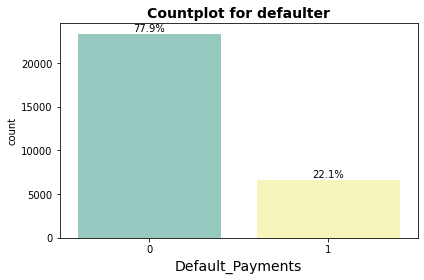

In [ ]:
# Visualizing defaulters
ax = sns.countplot(x = cred_df['Default_Payments'],palette = 'Set3')
plt.xlabel('Default_Payments',fontsize = 14)
plt.title('Countplot for defaulter',fontweight = 'bold',fontsize = 14)

total = len(cred_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()

#### Countplot shows that the customer is defaulter or not, **1** denotes the defaulter and **0** refers to who are not defaulters.

#### As it can be seen clearly in *Countplot* that data is imbalanced.

#### Imbalanced data leads us to the wrong prediction as we know that  **Logistic** and **Random Forest** have a bias nature towards the majority class it may be misclassified while fiting the model.

### **Independent variables**

#### Let's have some insights of categorical feature.

In [ ]:
# Sex
cred_df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
# Education
cred_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Here, counts of 0,4,5,6 comes in others category so we'll merge all this in one category.

In [ ]:
# Converting Education feature into 4 possible classes
fil = ((cred_df['EDUCATION'] == 0) | (cred_df['EDUCATION'] >= 5))
cred_df.loc[fil, 'EDUCATION'] = 4
cred_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

#### It looks much better now.

In [ ]:
# Marriage
cred_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

According to description of dataset 0 is also comes in others classification. So, I am going add 0 classification with 3.

In [ ]:
# Converting Marriage feature into 3 ossible classifiation
fil_1 = cred_df['MARRIAGE'] == 0
cred_df.loc[fil_1, 'MARRIAGE'] = 3
cred_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [ ]:
# Creating a dataframe with categorical features and dependent variable 
categorical_features = ['SEX','EDUCATION','MARRIAGE']
df_cat = cred_df[categorical_features]
df_cat['Defaulters'] = cred_df['Default_Payments']
df_cat.head(3) 

,SEX,EDUCATION,MARRIAGE,Defaulters
1,2,2,1,1
2,2,2,2,1
3,2,2,2,0


There is another thing that need to be done here, we have to change the classification denotion from 0,1,2,3 to a reasonable class that they actually tells us in the data description for e.g.,

Sex: (1 = Male,0 = Female)

So, we have to this with all the three categorical features.

In [ ]:
# Now replace the classification denotion 
df_cat['SEX'].replace({1 : 'Male',2 : 'Female'}, inplace = True)
df_cat['EDUCATION'].replace({1 : 'Graduates',2 : 'University',3 : 'High School',4 : 'Others'},inplace = True)
df_cat['MARRIAGE'].replace({1 : 'Married',2 : 'Single',3 : 'Others'},inplace = True)

### **Plotting all these Categorical features with Dependent variable**

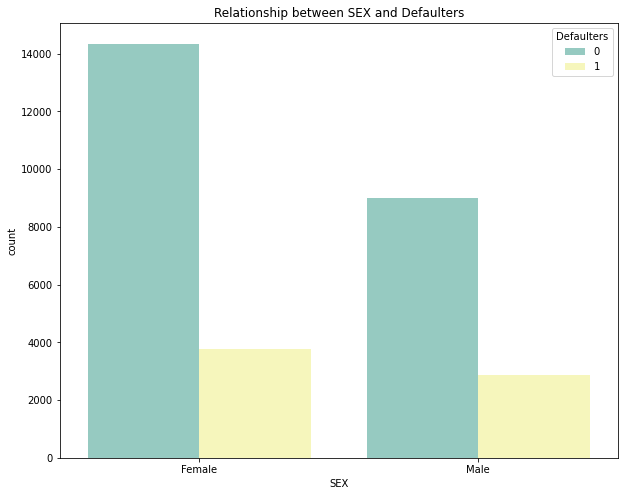

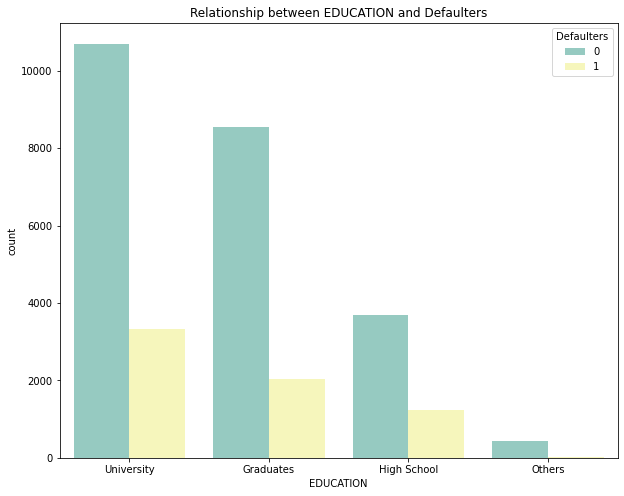

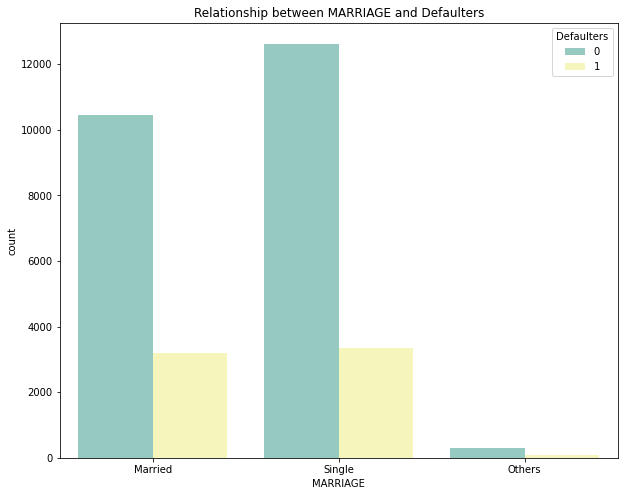

In [ ]:
# categorical features with dependent variable 
for col in categorical_features:
  fig, ax = plt.subplots(figsize = (10,8))
  sns.countplot(x = col, hue = 'Defaulters', data = df_cat,palette = "Set3")
  ax.set(title = 'Relationship between ' +col+ ' and Defaulters')

### Insights of categorical feature with dependent variable 

* Females have the majority holding of cred cards in comparison to males but ratio of defaulters is high in Males.
* University and Graduates are holding high proportions of Credit cards.
* Singles and Married have proportion of credit cards according to the countplot singles have more numbers in defaulters.

### **PAYMENT HISTORY ACCORDING TO MONTHS**
---

### Having insights of Pay scale with Default Payments 

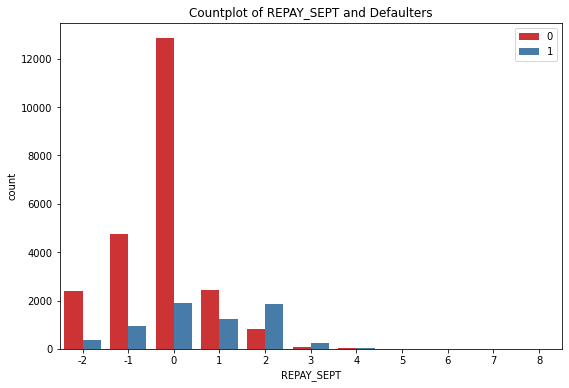

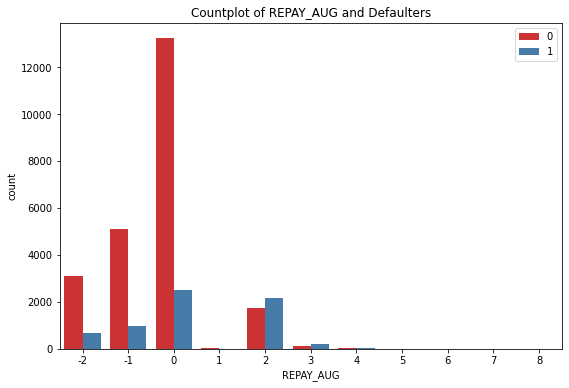

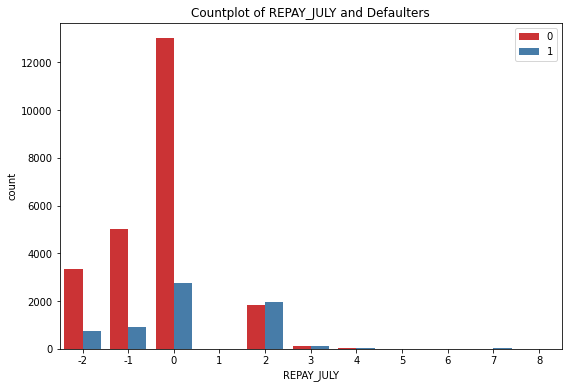

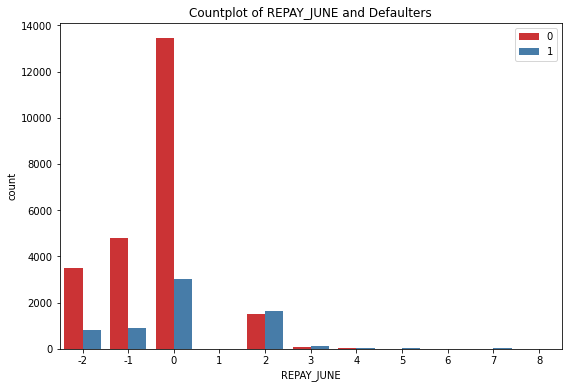

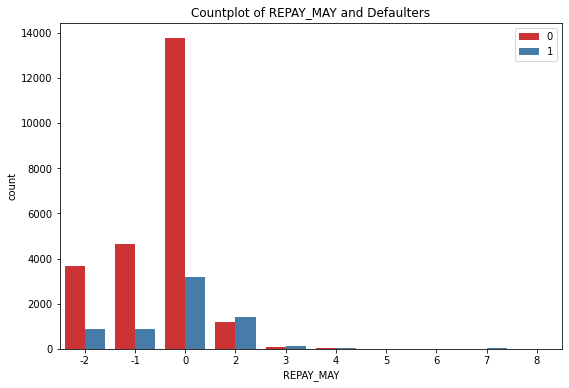

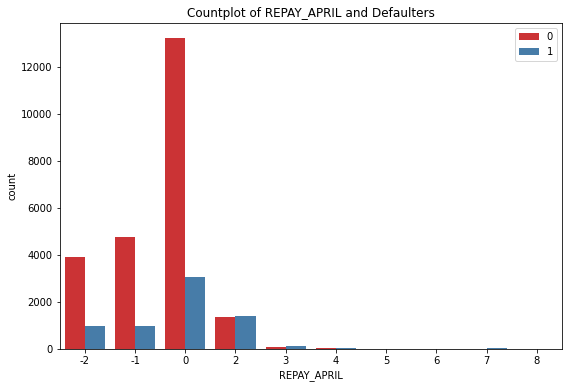

In [ ]:
# Amount paid in different months 
pay_scale = ['REPAY_SEPT','REPAY_AUG','REPAY_JULY','REPAY_JUNE','REPAY_MAY','REPAY_APRIL']
for col in pay_scale:
  fig, ax = plt.subplots(figsize = (9,6))
  sns.countplot(x = col, hue = 'Default_Payments',data = cred_df,palette = 'Set1')
  ax.legend(loc = 'upper right')
  ax.set(title = 'Countplot of '+col+' and Defaulters')
  

### Describing the Xlabel of Repay scale

-2 = No consumption

-1 = paid in full

0 = use of revolving credit (paid minimum only)

1 = payment delay for one month

2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

---

### **Continous Independent Features with Dependent Variable**
---
---

### **AGE**

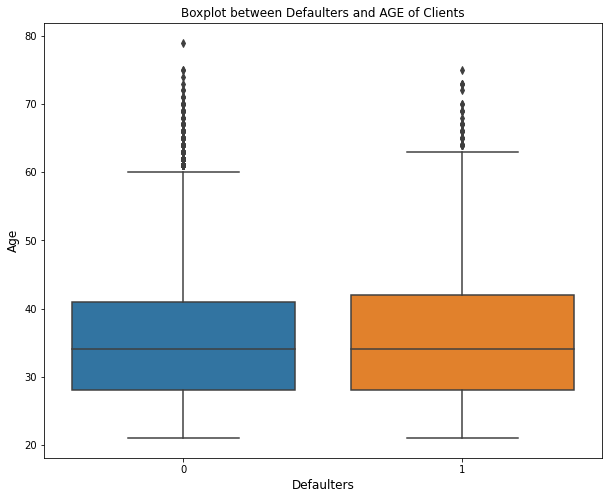

In [ ]:
# Boxplot AGE vs Defaulters
plt.figure(figsize = (10,8))
sns.boxplot(x = 'Default_Payments',y = 'AGE',data = cred_df)
plt.title('Boxplot between Defaulters and AGE of Clients')
plt.xlabel('Defaulters',fontsize = 12)
plt.ylabel('Age',fontsize = 12)
plt.show()

* Median shows that our poplutaion of defaulters and not defaulters are around 35 years
* Two many outliers are above the ages of 60 years in both classification. It means old-age people may be defaulters.

#### **LIMIT BALANCE**

Text(0, 0.5, 'Counts of defaulters')

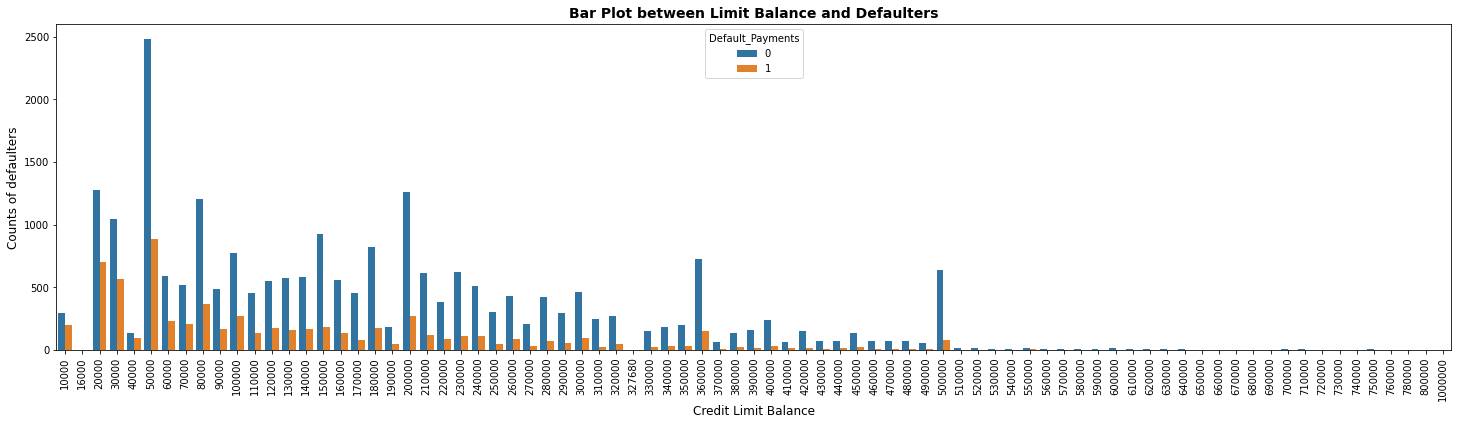

In [ ]:
# Limit Balance 
plt.figure(figsize = (25,6))
sns.countplot(x = 'LIMIT_BAL',hue = 'Default_Payments',data = cred_df,)
plt.xticks(rotation = 90)
plt.title('Bar Plot between Limit Balance and Defaulters', fontsize = 14, fontweight = 'bold')
plt.xlabel('Credit Limit Balance',fontsize = 12)
plt.ylabel('Counts of defaulters',fontsize = 12)

* Majority of the defaulters are those who have credit limit balance between 20,000 to 3,00,000
* After the credit limit 5,00,000, number of defaulters are almost negligible.

### **Lets Visualize the rest features of bill payments and amount of previous payments of different months**

**BILL AMOUNT**

In [ ]:
# Having just overview of mean of bill payments of defaulters
bill_amt = ['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JULY','BILL_AMT_JUNE','BILL_AMT_MAY','BILL_AMT_APRIL']
cred_df.groupby('Default_Payments')[bill_amt].mean()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL
Default_Payments,,,,,,
0,51994.227273,49717.435670,47533.365605,43611.165254,40530.445343,39042.268704
1,48509.162297,47283.617842,45181.598855,42036.950573,39540.190476,38271.435503


* Defaulters do not have average bill payment amount not more than 48,000(NT Dollar)
* The most concerned area about the defaulters are around the average bill amount. 

In [ ]:
# min bill payments of defaulters & not defaulters
cred_df.groupby('Default_Payments')[bill_amt].min()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL
Default_Payments,,,,,,
0,-165580,-69777,-157264,-170000,-81334,-209051
1,-6676,-17710,-61506,-65167,-53007,-339603


In [ ]:
# Max bill payments of defaulters & not defaulters
cred_df.groupby('Default_Payments')[bill_amt].max()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL
Default_Payments,,,,,,
0,964511,983931,1664089,891586,927171,961664
1,613860,581775,578971,548020,547880,514975


from above matrix we can conclude that defaulters lie within the range of maximum Bill Payment of approximately 60,000(NT Dollar)

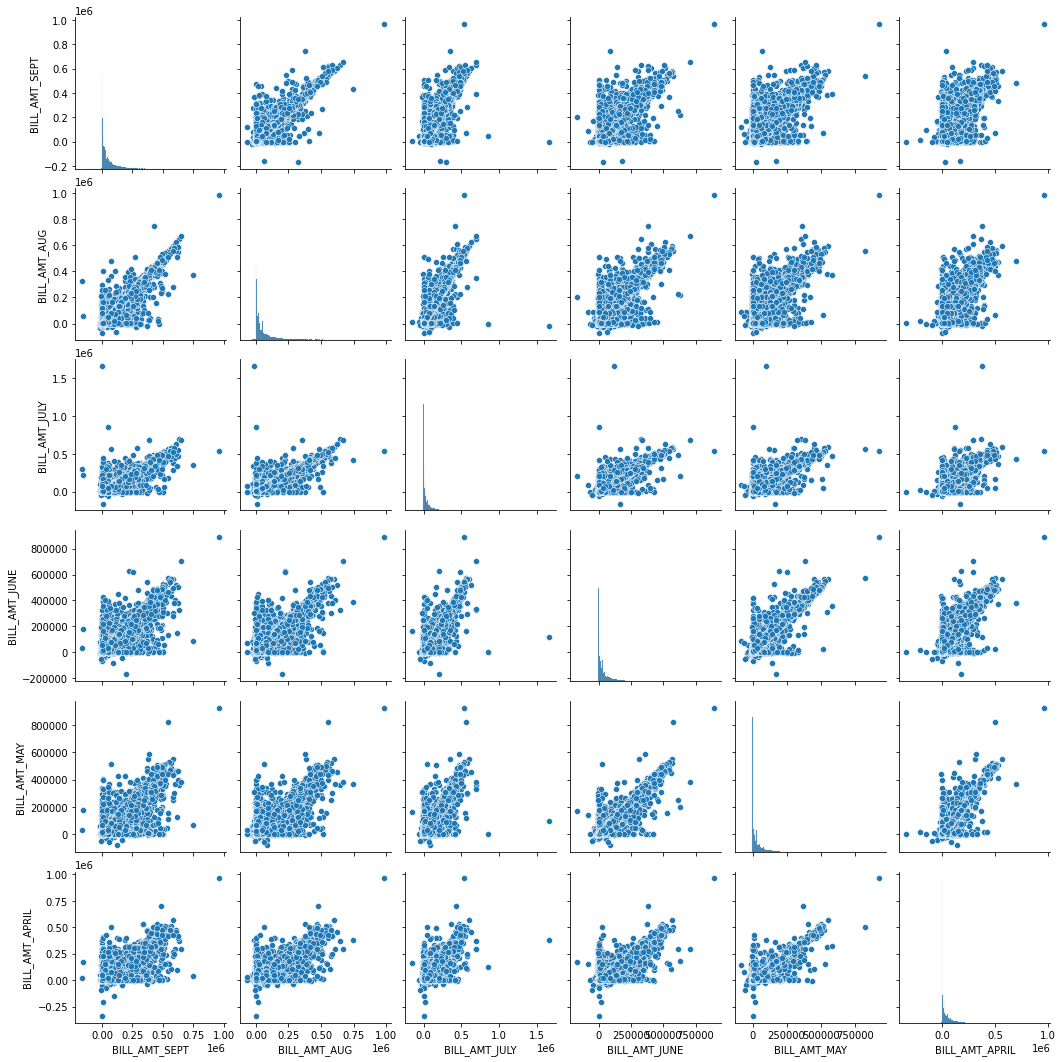

In [ ]:
# pairplot of BILL AMOUNT of different months
sns.pairplot(cred_df[bill_amt])

---
**PAYMENT AMOUNT**

In [ ]:
#Let's have a look at mean of  previous payment of different months 
pay_amt = ['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL']
cred_df.groupby("Default_Payments")[pay_amt].mean()

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL
Default_Payments,,,,,,
0,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


* Defaulters do not have average previous bill payment amount not more than 3500(NT Dollar)
* The most concerned area about the defaulters are around the average previous bill payment amount.

In [ ]:
# minimum previous amount paid by defaulters
cred_df.groupby('Default_Payments')[pay_amt].min()

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL
Default_Payments,,,,,,
0,0,0,0,0,0,0
1,0,0,0,0,0,0


In [ ]:
# maximum previous amount paid by defaulters
cred_df.groupby('Default_Payments')[pay_amt].max()

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL
Default_Payments,,,,,,
0,873552,1684259,896040,621000,426529,528666
1,300000,358689,508229,432130,332000,345293


from above matrix we can conclude that defaulters lie within the range of maximum previous bill Payment of approximately 50,000(NT Dollar)

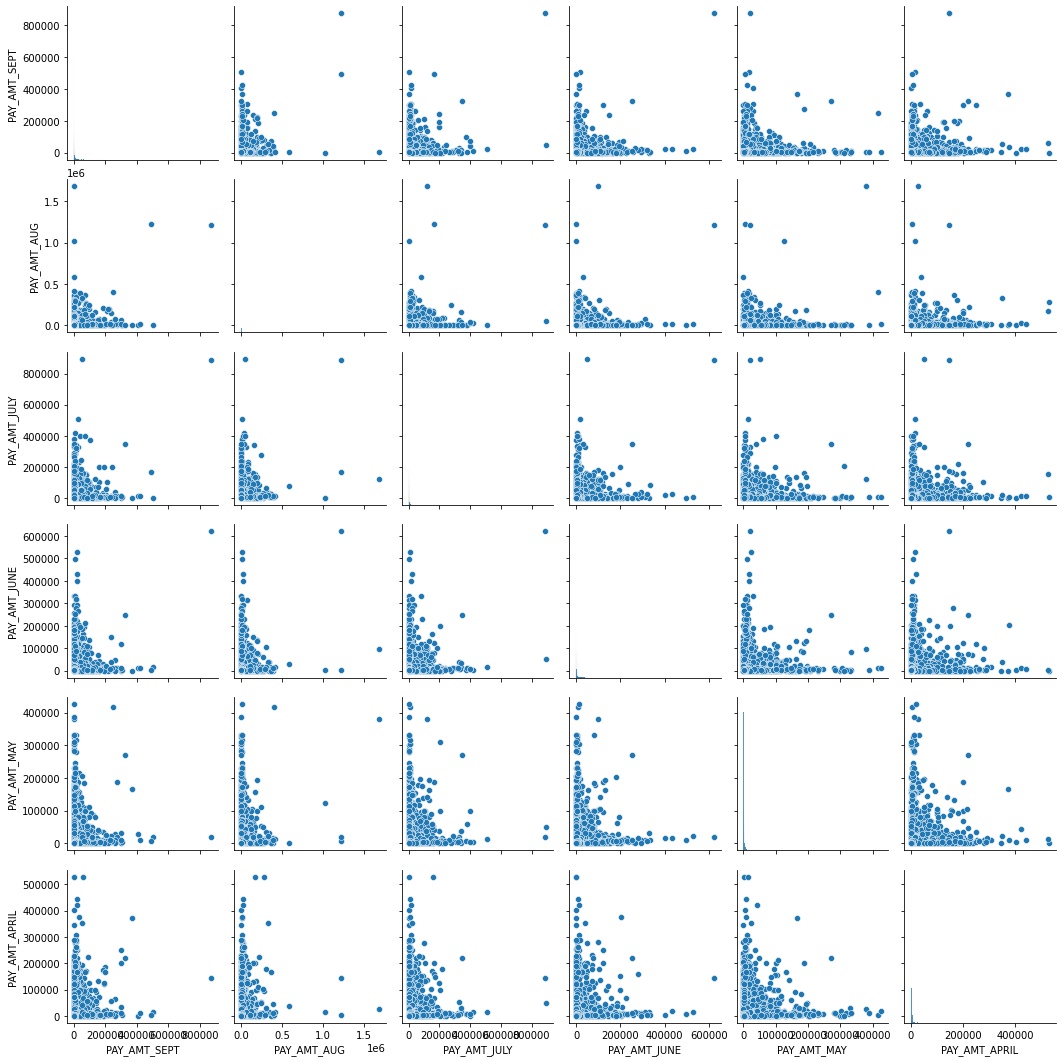

In [ ]:
# pairplpot of PREVIOUS PAYMENT of different months 
sns.pairplot(data = cred_df[pay_amt]) 

---
## **ONE-HOT ENCODING**
---
 One-hot encoding is a technique which is used to convert or transform a categorical feature having string labels into K numerical features in such a manner that the value of one out of K (one-of-K) features is 1 and the value of rest (K-1) features is 0. It is also called as dummy encoding as the features created as part of these techniques are dummy features which don’t represent any real world features. Rather they are created for encoding the different values of categorical feature using dummy numerical features. The primary need for using one-hot encoding technique is to transform or convert the categorical features into numerical features such that machine learning libraries can use the values to train the model.
 [One-hot encoding](https://vitalflux.com/one-hot-encoding-concepts-python-code-examples/#:~:text=Here%20is%20the%20summary%20of%20this%20post%3A%201,is%20used%20for%20one-hot%20encoding.%20More%20items...%20)

In [ ]:
# making a copy of dataset
cred_dup_df = cred_df.copy()

In [ ]:
# Transform features Marriage, Age and Education using one-hot-encoding
cred_dup_df = pd.get_dummies(cred_dup_df,columns = ['EDUCATION','SEX','MARRIAGE'])

In [ ]:
# renaming columns to get better understanding about dummy variables
cred_dup_df.rename(columns = {'EDUCATION_1':'EDUCATION_GRADUATE','EDUCATION_2':'EDUCATION_UNIVERSITY','EDUCATION_3':'EDUCATION_HIGH_SCHOOL','EDUCATION_4':'EDUCATION_OTHERS',
                              'SEX_1':'MALE','SEX_2':'FEMALE','MARRIAGE_1':'SINGLE','MARRIAGE_2':'MARRIED','MARRIAGE_3':'MARRIAGE_OTHERS'},inplace = True)

In [ ]:
cred_dup_df.head(3)

,ID,LIMIT_BAL,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JULY,REPAY_JUNE,REPAY_MAY,REPAY_APRIL,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,Default_Payments,EDUCATION_GRADUATE,EDUCATION_UNIVERSITY,EDUCATION_HIGH_SCHOOL,EDUCATION_OTHERS,MALE,FEMALE,SINGLE,MARRIED,MARRIAGE_OTHERS
1,1,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,0,0,1,1,0,0
2,2,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,0,0,1,0,1,0
3,3,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,0,0,1,0,1,0


### *Preparing data for Data Split*

In [ ]:
# Transform features of repayment of different months using one-hot encoding
cred_dup_df = pd.get_dummies(cred_dup_df, columns = ['REPAY_SEPT','REPAY_AUG','REPAY_JULY','REPAY_JUNE','REPAY_MAY','REPAY_APRIL'])

In [ ]:
# drop the features that are in no use
cred_dup_df.drop(['ID','EDUCATION_OTHERS','MARRIAGE_OTHERS'],axis = 1,inplace = True)

In [ ]:
cred_dup_df.head(3)

,LIMIT_BAL,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,Default_Payments,EDUCATION_GRADUATE,EDUCATION_UNIVERSITY,EDUCATION_HIGH_SCHOOL,MALE,FEMALE,SINGLE,MARRIED,REPAY_SEPT_-2,REPAY_SEPT_-1,REPAY_SEPT_0,REPAY_SEPT_1,REPAY_SEPT_2,REPAY_SEPT_3,REPAY_SEPT_4,REPAY_SEPT_5,REPAY_SEPT_6,REPAY_SEPT_7,REPAY_SEPT_8,REPAY_AUG_-2,REPAY_AUG_-1,REPAY_AUG_0,REPAY_AUG_1,REPAY_AUG_2,REPAY_AUG_3,REPAY_AUG_4,...,REPAY_JULY_0,REPAY_JULY_1,REPAY_JULY_2,REPAY_JULY_3,REPAY_JULY_4,REPAY_JULY_5,REPAY_JULY_6,REPAY_JULY_7,REPAY_JULY_8,REPAY_JUNE_-2,REPAY_JUNE_-1,REPAY_JUNE_0,REPAY_JUNE_1,REPAY_JUNE_2,REPAY_JUNE_3,REPAY_JUNE_4,REPAY_JUNE_5,REPAY_JUNE_6,REPAY_JUNE_7,REPAY_JUNE_8,REPAY_MAY_-2,REPAY_MAY_-1,REPAY_MAY_0,REPAY_MAY_2,REPAY_MAY_3,REPAY_MAY_4,REPAY_MAY_5,REPAY_MAY_6,REPAY_MAY_7,REPAY_MAY_8,REPAY_APRIL_-2,REPAY_APRIL_-1,REPAY_APRIL_0,REPAY_APRIL_2,REPAY_APRIL_3,REPAY_APRIL_4,REPAY_APRIL_5,REPAY_APRIL_6,REPAY_APRIL_7,REPAY_APRIL_8
1,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### **DIVIDING DATASETS INTO INDEPENDENT AND DEPENDENT VARIABLES**

In [ ]:
#independent variables
X = cred_dup_df.drop(['Default_Payments'],axis = 1)
# dependent variable 
y = cred_dup_df['Default_Payments']

### **SPLITTING *X* and *y* INTO TRAINING AND TESTING DATASETS**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [ ]:
print('Shape of X_train:{}'.format(X_train.shape))
print('Shape of y_train:{}'.format(y_train.shape))
print('Shape of X_test:{}'.format(X_test.shape))
print('Shape of y_test:{}'.format(y_test.shape))

Shape of X_train:(21000, 85)
Shape of y_train:(21000,)
Shape of X_test:(9000, 85)
Shape of y_test:(9000,)


### As I mentioned above that we have imbalanced dataset that can lead towards biasness while building the model. 

### To balance our dataset we'll use **SMOTE**.

---
## **SMOTE**(Synthetic Minority Oversampling Technique)
---

In [ ]:
# importing SMOTE 
from imblearn.over_sampling import SMOTE

print('Dataset Before:',y_train.value_counts())
smt = SMOTE()

# fit predictor and target variable
X_train_smt, y_train_smt = smt.fit_resample(X_train,y_train)

print('\nDataset After:',y_train_smt.value_counts())


Dataset Before: 0    16304
1     4696
Name: Default_Payments, dtype: int64

Dataset After: 1    16304
0    16304
Name: Default_Payments, dtype: int64


---
---
Our Training data is perfectly Balanced. 

Now we can implement different algorithms 

## **LOGISTIC REGRESSION**
---
Logistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. The regulation parameter C controls the trade-off between increasing complexity (overfitting) and keeping the model simple(underfitting),  This parameter signifies strength of the regularization and takes a positive float value. C and regularization strength are negatively correlated (smaller the C is stronger the regularization will be).

In [ ]:
#fitting the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression()
param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10] }   #set the parmeter

logistic_grid_model = GridSearchCV(logistic_regression, param_grid, scoring = 'precision',n_jobs = -1, verbose = 3, cv = 3)
logistic_grid_model.fit(X_train_smt,y_train_smt)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='precision', verbose=3)

In [ ]:
# Best estimator
logistic_grid_model.best_estimator_

LogisticRegression(C=0.6)

In [ ]:
# Best parameters 
logistic_grid_model.best_params_                          #it will give you the best one among all parameters

{'C': 0.6, 'penalty': 'l2'}

In [ ]:
logistic_grid_model.best_score_

0.6366475646884695

In [ ]:
# Predicted results
y_train_pred = logistic_grid_model.predict(X_train_smt)
y_test_pred = logistic_grid_model.predict(X_test)

In [ ]:
# importing important metrices
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix

In [ ]:
# training and testing accuracy 
train_accuracy = accuracy_score(y_train_pred, y_train_smt)
test_accuracy = accuracy_score(y_test_pred,y_test)

print('Training accuracy:', train_accuracy)
print('Testing accuracy:', test_accuracy)

Training accuracy: 0.6080103042198234
Testing accuracy: 0.6637777777777778


In [ ]:
# precision, recall, f1 score and confusion matrix
log_test_precision = precision_score(y_test,y_test_pred)
log_test_recall = recall_score(y_test,y_test_pred,)
log_f1_score = f1_score(y_test,y_test_pred)
log_roc_auc_score = roc_auc_score(y_test,y_test_pred)
log_confusion_mat = confusion_matrix(y_test,y_test_pred)

# Printing all these matrices
print('Precision score of logistic model:',log_test_precision)
print('Recall score of logistic model:', log_test_recall)
print('F1 score of logistic model: ', log_f1_score)
print('ROC AUC score of logistic model: ',log_roc_auc_score)
print('Confusion matrix of logistic model \n:',log_confusion_mat)

Precision score of logistic model: 0.3134020618556701
Recall score of logistic model: 0.47010309278350515
F1 score of logistic model:  0.37608247422680413
ROC AUC score of logistic model:  0.5935501299611579
Confusion matrix of logistic model 
: [[5062 1998]
 [1028  912]]


### **CONFUSION MATRIX OF LOGISTIC MODEL**

Text(0.5, 1.0, 'Confusion Matrix of Logistic Model')

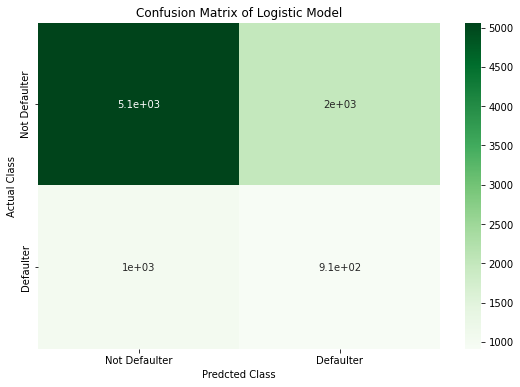

In [ ]:
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(log_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of Logistic Model',fontsize = 12)

---
### **DECISION TREE CLASSIFIER**
---
---


In [ ]:
# Building decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
decision_tree_model = GridSearchCV(dtc, param_grid = {'max_depth': [2,4,6,8],
                                                      'min_samples_leaf': [2,4,6,8,10],
                                                      'min_samples_split':[2,4,6,8,10]},
                                   scoring = 'recall',cv = 3, n_jobs = -1)
decision_tree_model.fit(X_train_smt,y_train_smt)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='recall')

In [ ]:
decision_tree_model.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

In [ ]:
decision_tree_model.best_params_

{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [ ]:
decision_tree_model.best_score_

0.7439324358077082

In [ ]:
decision_tree_model.score(X_train_smt,y_train_smt)

0.7450318940137389

In [ ]:
# Getting train and test predicted values
y_train_dtc_pred = decision_tree_model.predict(X_train_smt)
y_test_dtc_pred = decision_tree_model.predict(X_test)

In [ ]:
# Getting the training and testing accuracy
dtc_training_accuracy = accuracy_score(y_train_smt,y_train_dtc_pred)
dtc_testing_accuracy = accuracy_score(y_test, y_test_dtc_pred)

print('Training accuracy of decision tree classifier:',dtc_training_accuracy)
print('Testing accuracy of decision tree classifier:',dtc_testing_accuracy)

Training accuracy of decision tree classifier: 0.7477612855740923
Testing accuracy of decision tree classifier: 0.7183333333333334


In [ ]:
# Getting precision, recall, f1_score, roc_auc_score and confusion matrix
dtc_recall_score = recall_score(y_test,y_test_dtc_pred)
dtc_precision_score = recall_score(y_test,y_test_dtc_pred)
dtc_f1_score = f1_score(y_test, y_test_dtc_pred)
dtc_roc_auc_score = roc_auc_score(y_test,y_test_dtc_pred)

# Print all the metrics
print('Recall score of Decision Tree Classifier:',dtc_recall_score)
print('Precision score of Decision Tree Classifier:',dtc_precision_score)
print('F1 score of Decision Tree Classifier:',dtc_f1_score)
print('ROC-AUC score of Decision Tree Classifier:',dtc_roc_auc_score)

Recall score of Decision Tree Classifier: 0.5773195876288659
Precision score of Decision Tree Classifier: 0.5773195876288659
F1 score of Decision Tree Classifier: 0.46910994764397906
ROC-AUC score of Decision Tree Classifier: 0.667200870301685


### **CONFUSION MATRIX OF DECISION TREE CLASSIFIER**


Confusion Matrix of the Decision Tree Classifier:
 [[5345 1715]
 [ 820 1120]]


Text(0.5, 1.0, 'Confusion Matrix of Logistic Model')

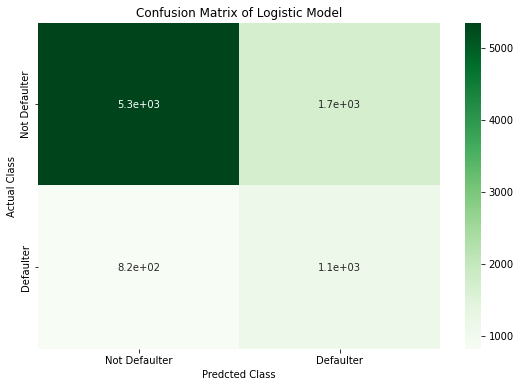

In [ ]:
# plotting confusion matrix of Decision Tree Classifier
dtc_confusion_mat = confusion_matrix(y_test,y_test_dtc_pred)
print('Confusion Matrix of the Decision Tree Classifier:\n',dtc_confusion_mat)

labels = ['Not Defaulter','Defaulter']
# heatmap
plt.figure(figsize = (9,6))
sns.heatmap(dtc_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of Logistic Model',fontsize = 12)

---
## **RANDOM FOREST**
---
---

In [ ]:
# Implementing random forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 100)
rf_classifier.fit(X_train_smt,y_train_smt)

RandomForestClassifier()

In [ ]:
# class predictions
y_train_rf_pred = rf_classifier.predict(X_train_smt)
y_test_rf_pred = rf_classifier.predict(X_test)

In [ ]:
# training and testing accuracy
rf_training_accuracy = accuracy_score(y_train_smt,y_train_rf_pred)
rf_testing_accuracy = accuracy_score(y_test,y_test_rf_pred)

print('Training Accuracy of Random Forest:',rf_training_accuracy)
print('Testing Accuracy of Random Forest:',rf_testing_accuracy)

Training Accuracy of Random Forest: 0.9998159960745829
Testing Accuracy of Random Forest: 0.8121111111111111


In [ ]:
# Metrics of Precision, recall, f1 score, confusion matrix and roc_auc score
rf_precision_score = precision_score(y_test_rf_pred,y_test)
rf_recall_score = recall_score(y_test_rf_pred,y_test)
rf_f1_score = f1_score(y_test_rf_pred,y_test)
rf_roc_auc_score = roc_auc_score(y_test_rf_pred,y_test)

print('Precision score of the Random Forest:',rf_precision_score)
print('Recall score of the Random Forest:',rf_recall_score)
print('F1 score of the Random Forest:',rf_f1_score)
print('ROC_AUC score of the Random Forest:',rf_roc_auc_score)

Precision score of the Random Forest: 0.39639175257731957
Recall score of the Random Forest: 0.5965865011636928
F1 score of the Random Forest: 0.4763084546299164
ROC_AUC score of the Random Forest: 0.7223627616699024


#### **HYPERPARAMETER TUNING**

In [ ]:
params_grid = {'n_estimators' : [100,150,200],'max_depth' : [10,20,30]}

In [ ]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(), params_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train_smt, y_train_smt)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [ ]:
grid_rf_clf.best_score_

0.8380826902661619

In [ ]:
grid_rf_clf.best_params_

{'max_depth': 30, 'n_estimators': 150}

In [ ]:
# Get the predicted classes
y_train_grid_rf_pred = grid_rf_clf.predict(X_train_smt)
y_test_grid_rf_pred = grid_rf_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
rf_training_accuracy = accuracy_score(y_train_grid_rf_pred,y_train_smt)
rf_testing_accuracy = accuracy_score(y_test_grid_rf_pred,y_test)

print("The accuracy on train data is ", rf_training_accuracy)
print("The accuracy on test data is ", rf_testing_accuracy)

The accuracy on train data is  0.9998159960745829
The accuracy on test data is  0.8131111111111111


In [ ]:
# evaluation metrics of RandomForest with hyperparameter tuning
rf_grid_precision_score = precision_score(y_test_grid_rf_pred,y_test)
rf_grid_recall_score = recall_score(y_test_grid_rf_pred,y_test)
rf_grid_f1_score = f1_score(y_test_grid_rf_pred,y_test)
rf_grid_roc_auc_score = roc_auc_score(y_test_grid_rf_pred,y_test)

print('Precision Score of RandomForest with Hyperparameter Tuning:',rf_grid_precision_score)
print('Recall Score of RandomForest with Hyperparameter Tuning:',rf_grid_recall_score)
print('F1 Score of RandomForest with Hyperparameter Tuning:',rf_grid_f1_score)
print('ROC AUC Score of RandomForest with Hyperparameter Tuning:',rf_grid_roc_auc_score)


Precision Score of RandomForest with Hyperparameter Tuning: 0.4041237113402062
Recall Score of RandomForest with Hyperparameter Tuning: 0.5984732824427481
F1 Score of RandomForest with Hyperparameter Tuning: 0.48246153846153855
ROC AUC Score of RandomForest with Hyperparameter Tuning: 0.7240740924567448


### **Confusion Matrix for RandomForest Classifier**


Confusion Matrix for RandomForest Classifier:
  [[6534 1156]
 [ 526  784]]


Text(0.5, 1.0, 'Confusion Matrix of RandomForest Classifier')

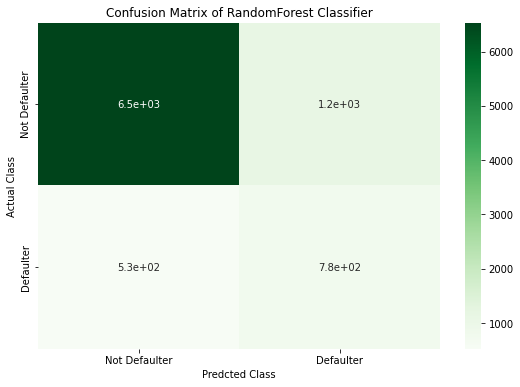

In [ ]:
rf_confusion_mat = confusion_matrix(y_test_grid_rf_pred,y_test)
print('Confusion Matrix for RandomForest Classifier:\n ',rf_confusion_mat)

# Plotting heatmap of confusion matrix
labels = ['Not Defaulter','Defaulter']
# heatmap
plt.figure(figsize = (9,6))
sns.heatmap(rf_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of RandomForest Classifier',fontsize = 12)

---
### **Applying XGBoost**
---
---

In [ ]:
# import xgboost
from xgboost import XGBClassifier

In [ ]:
# Fitting XGboost
xgb = XGBClassifier(class_weight = 'balanced',parameters = {'max_depth':7,'eta':1,'silent':1,'eval_metric':'auc'},random_state = 42)
xgb.fit(X_train_smt,y_train_smt)

XGBClassifier(class_weight='balanced',
              parameters={'eta': 1, 'eval_metric': 'auc', 'max_depth': 7,
                          'silent': 1},
              random_state=42)

In [ ]:
# train and test prediction
y_train_xgb_pred = xgb.predict(X_train_smt)
y_test_xgb_pred = xgb.predict(X_test)

In [ ]:
# gettig training and testing accuracy
xgb_training_accuracy = accuracy_score(y_train_xgb_pred,y_train_smt)
xgb_testing_accuracy = accuracy_score(y_test_xgb_pred,y_test)

print(f'Training Accuracy of XGBClassifier: {xgb_training_accuracy}')
print(f'Testing Accuracy of XGBClassifier: {xgb_testing_accuracy}')

Training Accuracy of XGBClassifier: 0.87122791952895
Testing Accuracy of XGBClassifier: 0.816


In [ ]:
# evaluation metrics of RandomForest with hyperparameter tuning
xgb_precision_score = precision_score(y_test_xgb_pred,y_test)
xgb_recall_score = recall_score(y_test_xgb_pred,y_test)
xgb_f1_score = f1_score(y_test_xgb_pred,y_test)
xgb_roc_auc_score = roc_auc_score(y_test_xgb_pred,y_test)

print('Precision Score of RandomForest with Hyperparameter Tuning:',xgb_precision_score)
print('Recall Score of RandomForest with Hyperparameter Tuning:',xgb_recall_score)
print('F1 Score of RandomForest with Hyperparameter Tuning:',xgb_f1_score)
print('ROC AUC Score of RandomForest with Hyperparameter Tuning:',xgb_roc_auc_score)

Precision Score of RandomForest with Hyperparameter Tuning: 0.395360824742268
Recall Score of RandomForest with Hyperparameter Tuning: 0.6136
F1 Score of RandomForest with Hyperparameter Tuning: 0.48087774294670843
ROC AUC Score of RandomForest with Hyperparameter Tuning: 0.7311225806451612


Confusion Matrix for XGBClassifier:
  [[6577 1173]
 [ 483  767]]


Text(0.5, 1.0, 'Confusion Matrix of XGBClassifier')

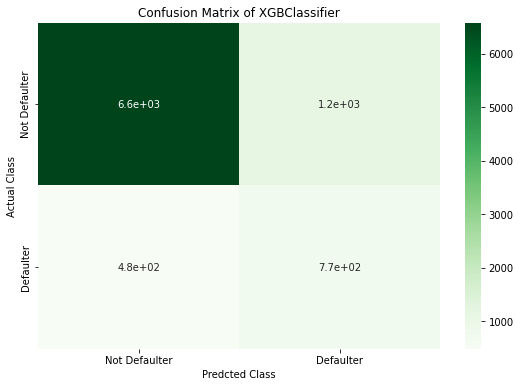

In [ ]:
# XG-Boost confusion matrix
xgb_confusion_mat = confusion_matrix(y_test_xgb_pred,y_test)
print('Confusion Matrix for XGBClassifier:\n ',xgb_confusion_mat)

# Plotting heatmap of confusion matrix
labels = ['Not Defaulter','Defaulter']
# heatmap
plt.figure(figsize = (9,6))
sns.heatmap(xgb_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of XGBClassifier',fontsize = 12)

### **MODEL EXPLAINABILITY**

In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 8.7 MB/s 


#### **APPLYING SHAPLEY TO GET FEATURES IMPORTANCE**
The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

In [ ]:
from shap import TreeExplainer
from shap import summary_plot
from shap import force_plot

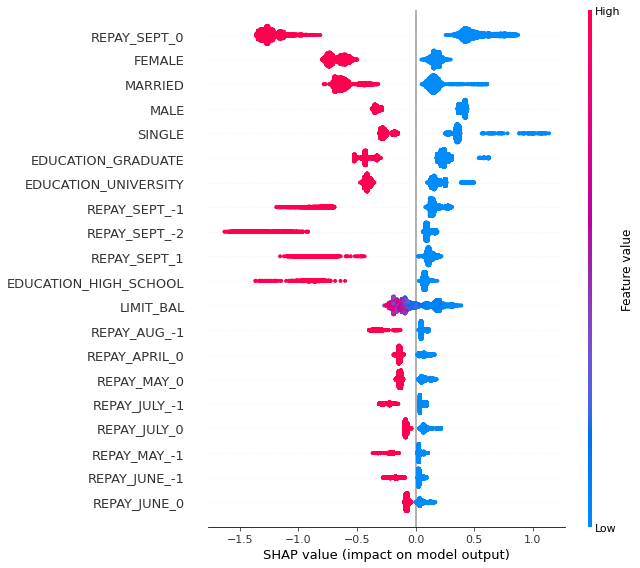

In [ ]:
# plotting summary plot
explainer = TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
summary_plot(shap_values,X_test)

From the Shap Summary_Plot we can explain our complex model.
* Red shows the high features values  and blue shows low feature values.
* On X axis there are shap values, positive will tell you about defaulter and negative values will tell customers will not default in next month.
* On y-axis, features are ordered in decreasing order in sense of importance for the XGBoost model to predict the default.

### Model Explaination 
* Top most features are the most important features to predict default payment like (Repayment_sept_0(revolving credit limit),Female, Male, Married, Single etc.)
* Higher the value of Repay_sept_0, there will be low chance that customer will default next month, lower the value of Repay_sept_0, there will be high chance of default next month.
* Similarly for the features(FEMALE, MALE, SINGLE, MARRIED, EDUCATION_GRADUATE, EDUCATION_UNIVERSITY).
* LIMIT_BAL is also important feature to explain our model. Higher the values of Limit balance there are less chance of default, lower the values of limit balance there are more chance of default. 

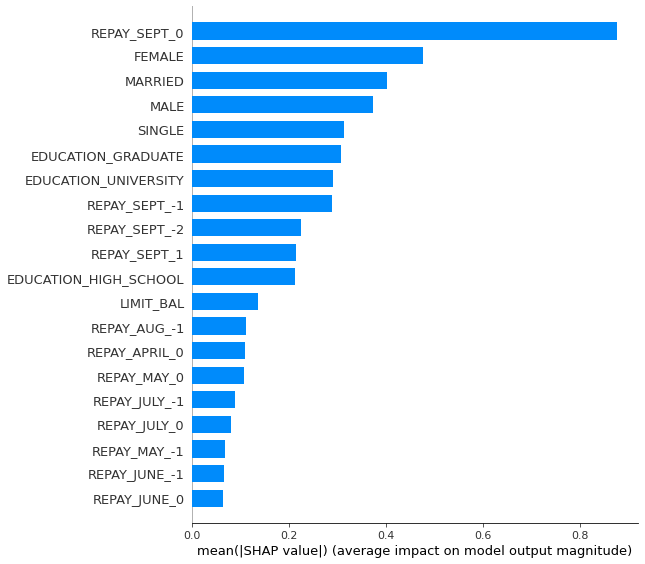

In [ ]:
# shap summary_plot with bar
summary_plot(shap_values, X_train_smt, plot_type="bar")

### Repay_Sept_0(Repayment status in september) is the most important feature, followed by Female, married, single. Similarly applies for the rest of the features in above summary_plot

---
### **EVALUATION METRIX**
---
---

In [ ]:
# explaining evaluation matrix
Models = ['Logistic Regression','Decision Tree Classifier','Random Forest', 'XGBoost Classifier']
train_accuracy = [train_accuracy, dtc_training_accuracy, rf_training_accuracy, xgb_training_accuracy]
test_accuracy = [test_accuracy, dtc_testing_accuracy, rf_testing_accuracy, xgb_testing_accuracy]
precision_score = [log_test_precision, dtc_precision_score, rf_grid_precision_score, xgb_precision_score]
recall_score = [log_test_recall, dtc_recall_score, rf_grid_recall_score,xgb_recall_score]
f1_score = [log_f1_score, dtc_f1_score, rf_grid_f1_score, xgb_f1_score]
roc_auc_score = [log_roc_auc_score, dtc_roc_auc_score, rf_grid_roc_auc_score, xgb_roc_auc_score]

data = {'Classification Models':Models,'Training Accuracy':train_accuracy,'Testing Accuracy':test_accuracy,
        'Precision Score':precision_score,'Recall Score':recall_score,'F1 Score':f1_score,'ROC-AUC Score':roc_auc_score}

In [ ]:
evaluation_matrix = pd.DataFrame(data)
evaluation_matrix

,Classification Models,Training Accuracy,Testing Accuracy,Precision Score,Recall Score,F1 Score,ROC-AUC Score
0,Logistic Regression,0.608010,0.663778,0.313402,0.470103,0.376082,0.593550
1,Decision Tree Classifier,0.747761,0.718333,0.577320,0.577320,0.469110,0.667201
2,Random Forest,0.999816,0.813111,0.404124,0.598473,0.482462,0.724074
3,XGBoost Classifier,0.871228,0.816000,0.395361,0.613600,0.480878,0.731123


**From the above Evaluation Matrix we can simply overlook all the models behaviour and their important matrix**

---
## **Plot ROC-AUC Curve**
---
---
### **ROC**(receiver operating characteristic curve) - **AUC**(area under curve) curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

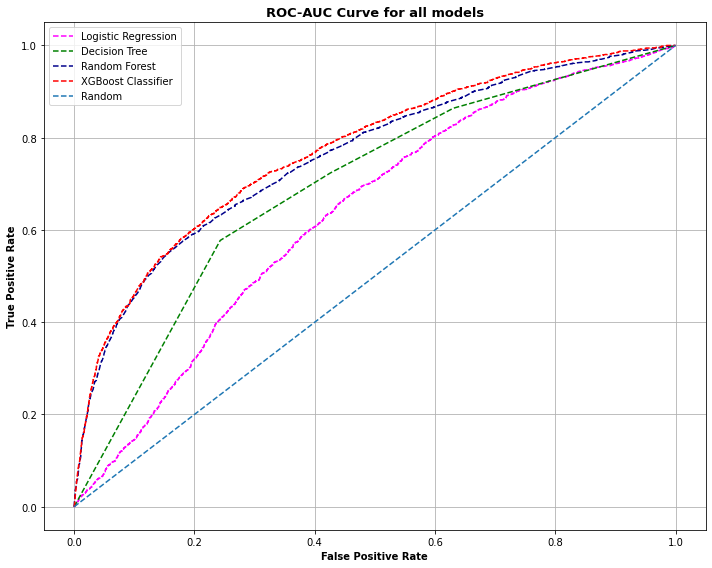

In [ ]:
from sklearn import metrics
# predicting probabilities for all model used
y_log_proba = logistic_grid_model.predict_proba(X_test)[::,1]
y_dtc_proba = decision_tree_model.predict_proba(X_test)[::,1]
y_rf_proba = grid_rf_clf.predict_proba(X_test)[::,1]
y_xgb_proba = xgb.predict_proba(X_test)[::,1]

# define metrics
fpr_log, tpr_log, _ = metrics.roc_curve(y_test, y_log_proba)
fpr_dtc, tpr_dtc, _ = metrics.roc_curve(y_test,  y_dtc_proba)
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_rf_proba)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  y_xgb_proba)

#
random_probs = [0 for _ in range(len(y_test))]
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)



# plotting ROC-AUC curve
plt.figure(figsize = (10,8))
plt.grid(True)

# plot the the ROC-AUC curve for the logistic Model
plt.plot(fpr_log, tpr_log, linestyle='--',color='magenta', label='Logistic Regression')

# plot the ROC-AUC curve for the decision tree model
plt.plot(fpr_dtc, tpr_dtc, linestyle='--',color='green', label='Decision Tree')

# plot the ROC-AUC curve for the RandomForest
plt.plot(fpr_rf, tpr_rf, linestyle='--',color='darkblue', label='Random Forest')

# plot the ROC-AUC curve for the xgb model
plt.plot(fpr_xgb, tpr_xgb, linestyle='--',color='red', label='XGBoost Classifier')

#plot the ROC-AUC curve for the random model 
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')


# Defining titles and co-ordinates labels
plt.title('ROC-AUC Curve for all models',fontweight = 'bold', fontsize = 13)
plt.xlabel('False Positive Rate',fontweight = 'bold')
plt.ylabel('True Positive Rate',fontweight = 'bold')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

**Conclusion**
 * By Visualtization customers who are 35 years of age are more likely to be defaulter.
 * Majority of the defaulters are those who have credit limit balance between 20,000 to 3,00,000
 * One-Hot encoding method is used to deal with categorical variable having string labels into k numerical features, like Age, Marriage, Education etc.
 * We had Imbalanced dataset so, to deal with this problem SMOTE(Synthetic Minority Oversampling Technique) has been applied after splitting the data.
 
**Four models have been applied on the data to assess the which model is best to evaluate the defaulter(Logistic Regression, Decision Tree Classifier, Random Forest and XGBoost classifier).**
* Using a Logistic Regression classifier, we can predict with 66.37% accuracy,  whether a customer is likely to default next month.
* Using Decision Tree classifier, we can predict with 71.83% accuracy whether a customer is likely to default next month or not.
* Using Random Forest, we can predict with 81.38% accuracy whether a customer will be defaulter in next month or not.
* By applying XGBoost Classifier with recall 60.60%, we can predict with 81.60% accuracy whether a customer is likely to default next month.

**From the models that are applied on the dataset, *XGBoost and Random Forest* are giving the best evaluation metrices(precision, F1-score and ROC-AUC score).** 

On behalf of these metrices we can predict whether customers would be defaulter or not in the next month.

From the **ROC-AUC** curve, Random Forest and XGBoost classifier are more able to distinguish between positive and negative class.